In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df1=pd.read_csv(r"D:\datasets\uniacco.csv",index_col='Unnamed: 0')

In [3]:
df1.head(10)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
5,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Wants private accommodation,120,semester-stay,NaN,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b26f82b657d94e19ef8382877006c3e9425d7e4ab836f9...
6,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Short stay,0-0,0,NaN,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,7ea9868bb6b4ebe610b0e509950b10322bcb7241d4a101...
7,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£181 - £240 Per Week,51,08/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db6521

In [4]:
col=df1.columns
col

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [5]:
df1.shape

(46608, 15)

In [6]:
df1.describe().T

,count,unique,top,freq
Agent_id,46608,120,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,8186
status,46608,6,LOST,43244
lost_reason,43244,30,Low availability,8892
budget,42908,1857,£60 - £120 Per week,9862
lease,44267,311,Full Year Course Stay 40 - 44 weeks,11111
movein,32970,477,10/09/22,2453
source,46608,683,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,19306
source_city,46608,4336,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,8851
source_country,46608,186,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,18812
utm_source,46608,35,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,31125


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46608 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46608 non-null  object
 1   status          46608 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42908 non-null  object
 4   lease           44267 non-null  object
 5   movein          32970 non-null  object
 6   source          46608 non-null  object
 7   source_city     46608 non-null  object
 8   source_country  46608 non-null  object
 9   utm_source      46608 non-null  object
 10  utm_medium      46608 non-null  object
 11  des_city        46608 non-null  object
 12  des_country     46608 non-null  object
 13  room_type       23061 non-null  object
 14  lead_id         46608 non-null  object
dtypes: object(15)
memory usage: 5.7+ MB


In [8]:
df1.isin(['9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0'])

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
46604,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
46605,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
46606,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df1.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.NAN, inplace=True)
df1.head(3)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...


In [10]:
df = df1.drop_duplicates(keep = 'first')
df.shape

(46598, 15)

In [11]:
df =df[(df['status'] == 'WON') | (df['status'] == 'LOST')]
df['status'].value_counts()

LOST    43235
WON      3072
Name: status, dtype: int64

In [12]:
df['status'] = df['status'].map({'WON':1, 'LOST':0})
df['status'].value_counts()

0    43235
1     3072
Name: status, dtype: int64

In [13]:
#we can make a function to remove column that having more tha 405 percent missing value
def missing_col(val,count):
    col = []
    col = list(val.drop(val.loc[:,list((100*(val.isnull().sum()/len(val.index)) >= count))].columns, 1).columns.values)
    print("Columns having more than %s percent missing values: "%count, (val.shape[1] - len(col)))
    print("Columns to be dropped                             : ", list(set(list((val.columns.values))) - set(col)))
    return col
col = missing_col(df, 40)
df =df[col]
df.head()

Columns having more than 40 percent missing values:  1
Columns to be dropped                             :  ['room_type']


C:\Users\UsEr\AppData\Local\Temp\ipykernel_3024\155345272.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  col = list(val.drop(val.loc[:,list((100*(val.isnull().sum()/len(val.index)) >= count))].columns, 1).columns.values)


,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [14]:
#['room_type'] column has been removed

In [15]:
#Now looks at rows

In [16]:
ptg= 70.0 
min_count =  int(((100-ptg)/100)*df.shape[1] + 1)
df = df.dropna(axis=0, thresh=min_count)
df.shape

(46307, 14)

In [17]:
#No rows have more than 70% missing values

In [18]:
for col in col:
    print("Column Name        :", col)
    print("------------------------------------------")
    print(df[col].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Agent_id
------------------------------------------
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.658237
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.131276
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.762001
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.386248
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.308506
                                                                      ...    
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed     0.002160
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002160
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002160
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002160
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002160
Name: Agent_id, Length: 120, dtype: float64


Column Name        : st

In [19]:
col_drop = ['des_country','lead_id']
df.drop(col_drop, axis=1, inplace=True)
round(df.isnull().sum() * 100 / len(df), 2)

Agent_id           0.00
status             0.00
lost_reason        6.63
budget             7.96
lease              5.04
movein            29.38
source            12.84
source_city       19.05
source_country    18.60
utm_source         0.13
utm_medium         6.87
des_city           5.46
dtype: float64

In [20]:
col=df.columns
col

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city'],
      dtype='object')

In [21]:
categories= ['lost_reason', 'budget', 'lease', 'movein','source', 'source_city', 'source_country', 'des_city','utm_source','utm_medium']
for col in categories:
    print("Column Name        :", col)
    print("------------------------------")
    #print("Unique Values      : ", leads_modified_df[column_name].unique())
    
    new_val = df[col].isnull().sum()
    print("Any Null (Before)  :", new_val)
    
    df[col].fillna(df[col].mode()[0], inplace=True)
    print(new_val, " values imputed with mode values of the column.")
    
    print("Null Values (After):", df[col].isnull().sum())
    print('\n')

Column Name        : lost_reason
------------------------------
Any Null (Before)  : 3072
3072  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : budget
------------------------------
Any Null (Before)  : 3687
3687  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : lease
------------------------------
Any Null (Before)  : 2334
2334  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : movein
------------------------------
Any Null (Before)  : 13605
13605  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : source
------------------------------
Any Null (Before)  : 5946
5946  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : source_city
------------------------------
Any Null (Before)  : 8821
8821  values imputed with mode values of the column.
Null Values (After): 0


Column Name

In [22]:
col=df.columns
for col in col:
    print("Column Name        :", col)
    print("-----------------------------------------------------")
    print(df[col].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Agent_id
-----------------------------------------------------
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.658237
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.131276
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.762001
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.386248
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.308506
                                                                      ...    
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed     0.002160
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002160
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002160
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002160
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002160
Name: Agent_id, Length: 120, dtype: float64


Column Name 

In [23]:
def change(x, value_counts_df):
    for key, val in value_counts_df.to_dict().items():
        if key == x and val < 10:
            return 'others'
    return x

# Checking the unique categories
columns_not_to_be_considered = ['status']
column_names = df.columns
column_names = column_names.drop(columns_not_to_be_considered)
columns_to_be_changed = column_names

for column_name in columns_to_be_changed:
    print("Column Name : ", column_name)
    print("-----------------------------------------")

    value_counts_df = df[column_name].value_counts(normalize=True) * 100
    print("Before :")
    print(value_counts_df)
    print('\n')

    df[column_name] = df[column_name].apply(lambda x:change(x, value_counts_df))
    value_counts_df = df[column_name].value_counts(normalize=True) * 100
    print("After :")
    print(value_counts_df)
    print('\n')

Column Name :  Agent_id
-----------------------------------------
Before :
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.658237
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.131276
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.762001
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.386248
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.308506
                                                                      ...    
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed     0.002160
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002160
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002160
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002160
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002160
Name: Agent_id, Length: 120, dtype: float64


After :
others       

In [24]:
df = df.dropna()

In [25]:
print("Before Cleaning Data")
print("*********************************")
print("Shape: ", df1.shape)
print("Missing:")
print("-----------------------")
print(round(df1.isnull().sum()*100/len(df1), 2))

print('\n')
print("After Cleaning Data")
print("*********************************")
print("Shape: ", df.shape)
print("Missing:")
print("-----------------------")
print(round(df.isnull().sum()*100/len(df), 2))

Before Cleaning Data
*********************************
Shape:  (46608, 15)
Missing:
-----------------------
Agent_id           0.00
status             0.00
lost_reason        7.22
budget             7.94
lease              5.02
movein            29.26
source            12.82
source_city       18.99
source_country    18.54
utm_source         0.13
utm_medium         6.84
des_city           5.44
des_country        5.44
room_type         50.52
lead_id            0.00
dtype: float64


After Cleaning Data
*********************************
Shape:  (46307, 12)
Missing:
-----------------------
Agent_id          0.0
status            0.0
lost_reason       0.0
budget            0.0
lease             0.0
movein            0.0
source            0.0
source_city       0.0
source_country    0.0
utm_source        0.0
utm_medium        0.0
des_city          0.0
dtype: float64


# Data Preparation


In [26]:
col= ['Agent_id','lost_reason','budget','lease','movein','source','source_city','source_country','utm_source','utm_medium','des_city']

for col in col:
    dummy = pd.get_dummies(df[col])
    dummy.drop('others', axis=1, inplace=True)
    df = pd.concat([df, dummy], axis=1)
    df.drop(col, axis=1, inplace=True)
    print("Dummies created for: ", col)

Dummies created for:  Agent_id
Dummies created for:  lost_reason
Dummies created for:  budget
Dummies created for:  lease
Dummies created for:  movein
Dummies created for:  source
Dummies created for:  source_city
Dummies created for:  source_country
Dummies created for:  utm_source
Dummies created for:  utm_medium
Dummies created for:  des_city


In [27]:
df.head()

,status,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0,...,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0,0,0,0,0,0,1,0,0,1,0,...,1,1,1,1,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,1


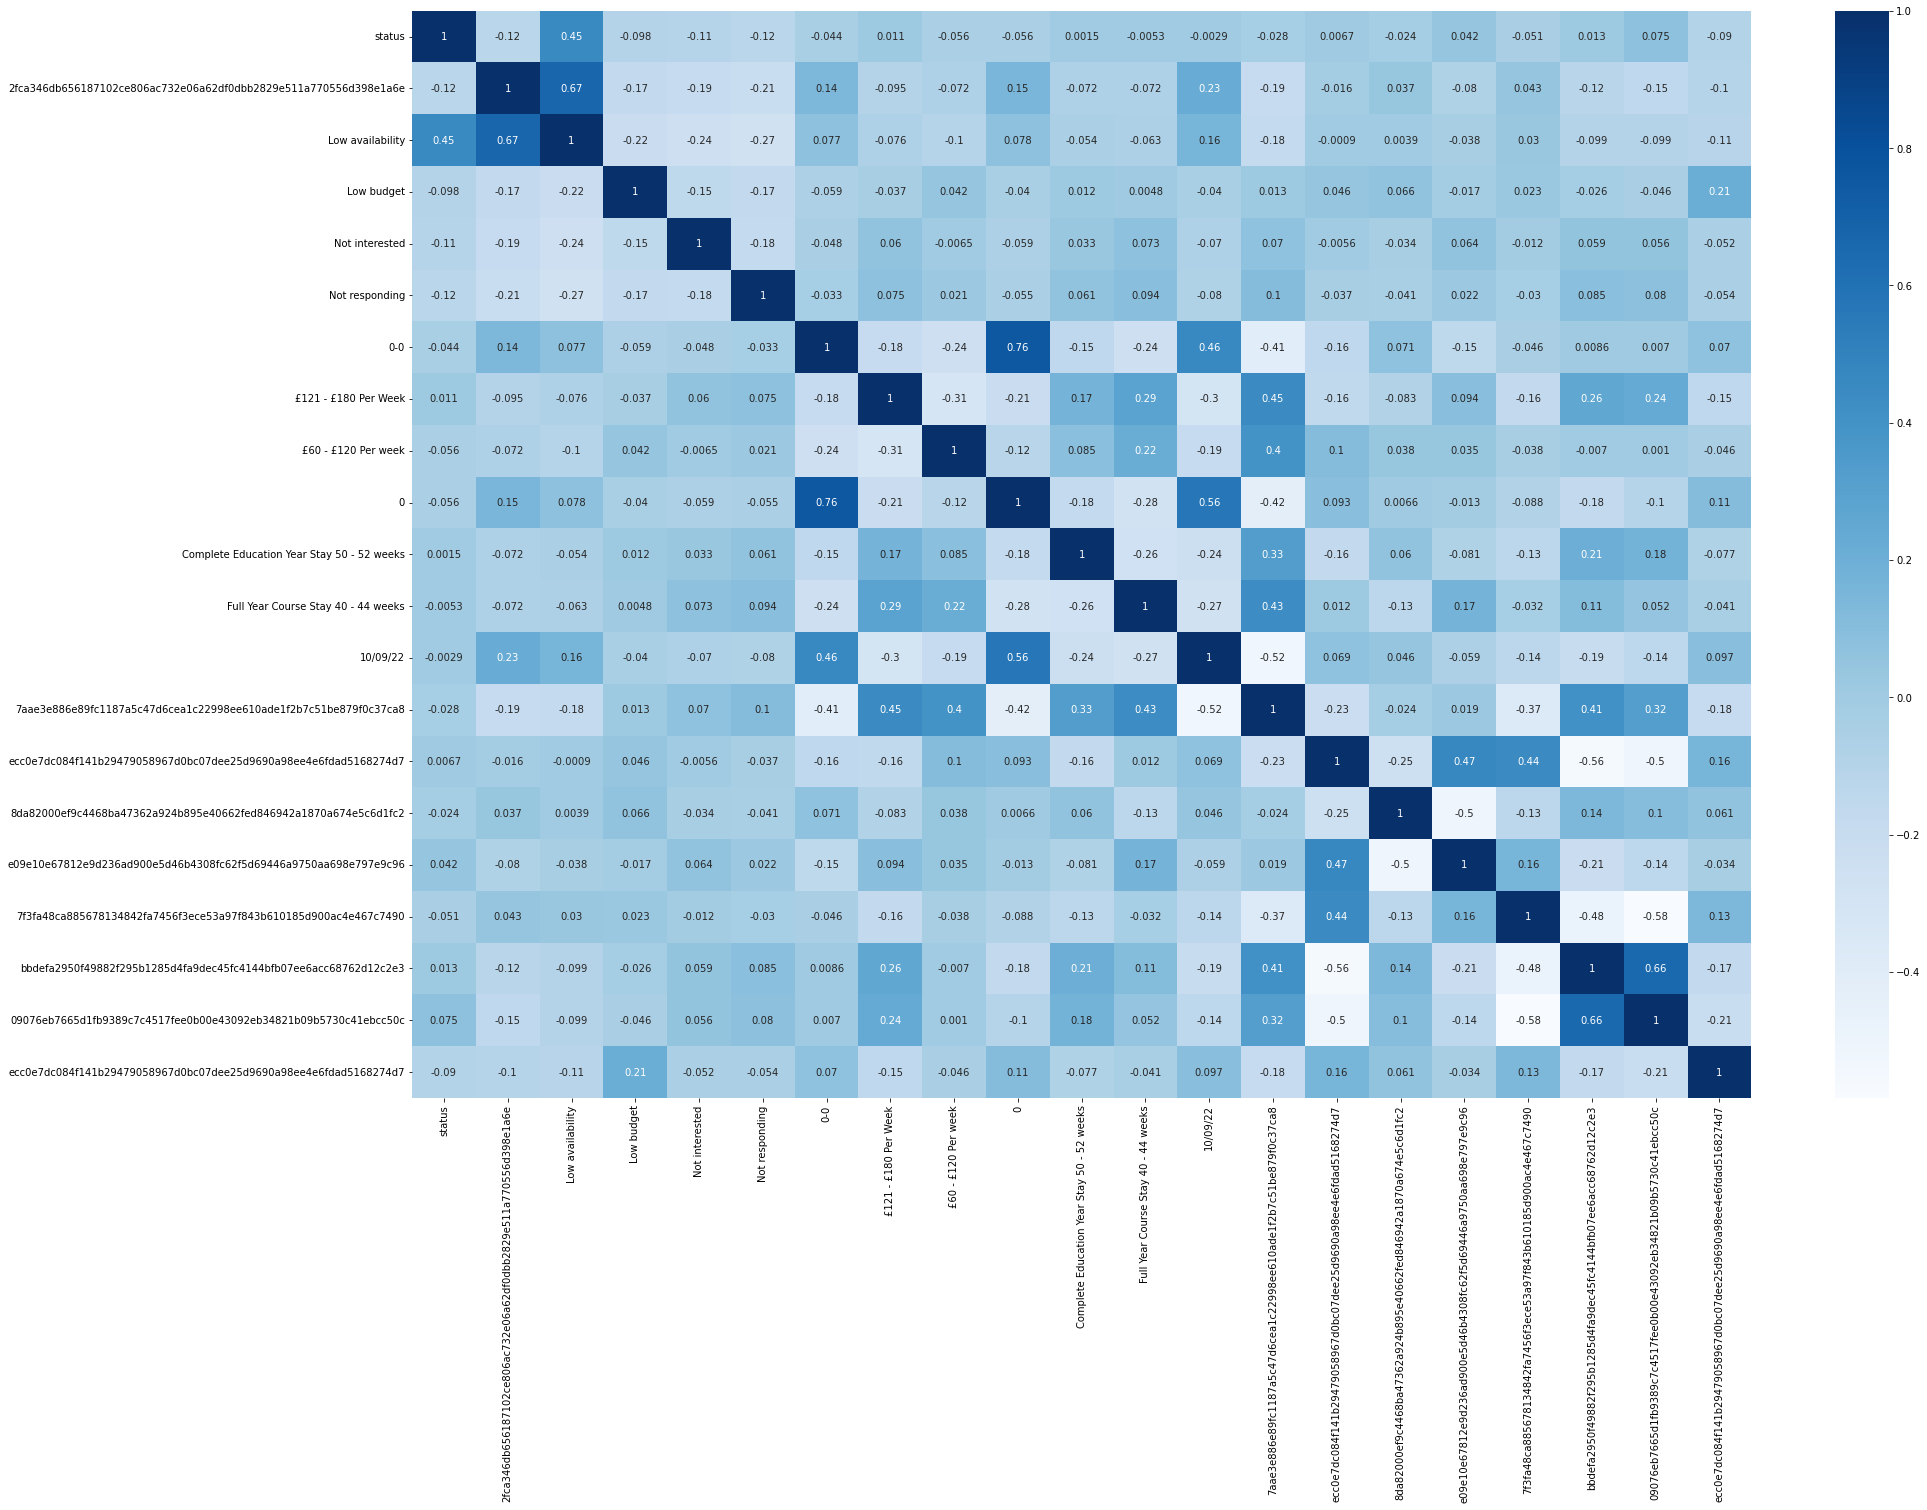

In [28]:
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(), annot = True, cmap="Blues")
plt.show()

In [29]:
#train and test

In [30]:
X = df.drop('status', axis=1)
X.head()

,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0,Complete Education Year Stay 50 - 52 weeks,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1


In [31]:
y = df.status
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [33]:
#log regression

In [34]:
logrg1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

logrg1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32414
Model:                            GLM   Df Residuals:                    32393
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1461.3
Date:                Tue, 11 Apr 2023   Deviance:                       2922.6
Time:                        16:23:34   Pearson chi2:                 3.34e+03
No. Iterations:                    29   Pseudo R-squ. (CS):             0.3290
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -30.8819   2.37e+04     -0.001      0.999   -4.64e+04    4.64e+04
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   -31.6546   3.08e+04     -0.001      0.999   -6.04e+04    6.04e+04
Low availability                                                    31.6255   2.37e+04      0.001      0.999   -4.64e+04    4.64e+04
Low budget                                                           0.2735    4.5e+04   6.08e-06      1.000   -8.82e+04    8.82e+04
Not interested                                                      -0.3886   4.44e+04  -8.76e-06      1.000   -8.69e+04    8.69e+04
Not responding                                                      -0.3236   4.13e+04  -7.84e-06      1.000   -8.09e+04    8.09e+04
0-0                                                                 -0.6577      0.256     -2.569      0.010      -1.160      -0.156
£121 - £180 Per Week                                                 0.2762      0.173      1.595      0.111      -0.063       0.616
£60 - £120 Per week                                                 -0.1498      0.148     -1.009      0.313      -0.441       0.141
0                                                                   -0.8364      0.243     -3.448      0.001      -1.312      -0.361
Complete Education Year Stay 50 - 52 weeks                           0.0578      0.170      0.340      0.734      -0.275       0.390
Full Year Course Stay 40 - 44 weeks                                  0.1089      0.147      0.740      0.459      -0.179       0.397
10/09/22                                                             0.2202      0.135      1.634      0.102      -0.044       0.484
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    -0.7282      0.177     -4.123      0.000      -1.074      -0.382
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7     0.1659      0.153      1.087      0.277      -0.133       0.465
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2    -0.0686      0.151     -0.454      0.650      -0.365       0.228
e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96     0.5860      0.124      4.722      0.000       0.343       0.829
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490    -0.5708      0.225     -2.538      0.011      -1.012      -0.130
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3     0.1817      0.130      1.399      0.162      -0.073       0.436
09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c     0.8784      0.142      6.178      0.000       0.600       1.157
ecc0e7dc084f141b29479058

In [35]:
log= LogisticRegression()


rfe = RFE(log, step=17)             
rfe = rfe.fit(X_train, y_train)

# Listing the columns
for i in list(zip(X_train.columns, rfe.support_, rfe.ranking_)):
    print(i)

('2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e', True, 1)
('Low availability', True, 1)
('Low budget', True, 1)
('Not interested', True, 1)
('Not responding', True, 1)
('0-0', True, 1)
('£121 - £180 Per Week', False, 2)
('£60 - £120 Per week', False, 2)
('0', True, 1)
('Complete Education Year Stay 50 - 52 weeks', False, 2)
('Full Year Course Stay 40 - 44 weeks', False, 2)
('10/09/22', False, 2)
('7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8', True, 1)
('ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7', False, 2)
('8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2', False, 2)
('e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96', False, 2)
('7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490', False, 2)
('bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3', False, 2)
('09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c', True, 1)
('ecc0e7dc084f141b29479058967d

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e',
       'Low availability', 'Low budget', 'Not interested', 'Not responding',
       '0-0', '0',
       '7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8',
       '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c',
       'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7'],
      dtype='object')

In [37]:
z = X_train.columns[~rfe.support_]
z

Index(['£121 - £180 Per Week', '£60 - £120 Per week',
       'Complete Education Year Stay 50 - 52 weeks',
       'Full Year Course Stay 40 - 44 weeks', '10/09/22',
       'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7',
       '8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2',
       'e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96',
       '7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490',
       'bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3'],
      dtype='object')

In [38]:
X_train_sm = sm.add_constant(X_train[col])
logrg2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logrg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32414
Model:                            GLM   Df Residuals:                    32402
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1490.7
Date:                Tue, 11 Apr 2023   Deviance:                       2981.5
Time:                        16:23:36   Pearson chi2:                 3.34e+03
No. Iterations:                    29   Pseudo R-squ. (CS):             0.3278
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -30.6560   2.38e+04     -0.001      0.999   -4.67e+04    4.67e+04
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   -31.6081    3.1e+04     -0.001      0.999   -6.09e+04    6.08e+04
Low availability                                                    31.6020   2.38e+04      0.001      0.999   -4.67e+04    4.67e+04
Low budget                                                           0.2457   4.52e+04   5.43e-06      1.000   -8.86e+04    8.87e+04
Not interested                                                      -0.2972   4.47e+04  -6.65e-06      1.000   -8.75e+04    8.75e+04
Not responding                                                      -0.2606   4.16e+04  -6.27e-06      1.000   -8.15e+04    8.15e+04
0-0                                                                 -0.8000      0.245     -3.268      0.001      -1.280      -0.320
0                                                                   -0.5625      0.215     -2.614      0.009      -0.984      -0.141
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    -0.5955      0.113     -5.288      0.000      -0.816      -0.375
09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c     1.1503      0.123      9.359      0.000       0.909       1.391
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7     0.3180      0.124      2.572      0.010       0.076       0.560
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7    -2.8585      0.110    -25.992      0.000      -3.074      -2.643
====================================================================================================================================
"""

In [39]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([2.76703997e-14, 1.16240290e-13, 2.06901847e-15, 6.20165471e-15,
       8.95746711e-14, 8.40593239e-14, 1.48612463e-13, 8.45748744e-14,
       6.51733281e-14, 1.08128433e-13])

In [40]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,2.767040e-14,38889
1,0,1.162403e-13,37925
2,0,2.069018e-15,11421
3,0,6.201655e-15,30608
4,0,8.957467e-14,31394


In [41]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted
0,0,2.767040e-14,38889,0
1,0,1.162403e-13,37925,0
2,0,2.069018e-15,11421,0
3,0,6.201655e-15,30608,0
4,0,8.957467e-14,31394,0


In [42]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,Lead_Score
0,0,2.767040e-14,38889,0,0
1,0,1.162403e-13,37925,0,0
2,0,2.069018e-15,11421,0,0
3,0,6.201655e-15,30608,0,0
4,0,8.957467e-14,31394,0,0


In [43]:
y_train_pred_final['Lead_Score'].value_counts()

0     29135
82     1038
89      469
92      262
20      183
17      172
86      159
68      156
78      124
32      109
72       77
13       76
10       64
11       57
39       41
4        40
40       35
59       31
66       31
67       30
27       30
26       17
8        15
54       12
74       11
79       11
14       10
6         9
5         4
53        4
61        1
21        1
Name: Lead_Score, dtype: int64

In [44]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[29832   425]
 [  166  1991]]


In [45]:
print(metrics.classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30257
           1       0.82      0.92      0.87      2157

    accuracy                           0.98     32414
   macro avg       0.91      0.95      0.93     32414
weighted avg       0.98      0.98      0.98     32414



In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,0-0,0.13
6,0,0.10
1,Low availability,0.06
0,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,0.05
3,Not interested,0.04
4,Not responding,0.04
2,Low budget,0.02
7,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,0.02
9,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.02
8,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,0.00


### Accuracy

In [47]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[29832   425]
 [  166  1991]]


In [48]:
TP = confusion[1,1]  
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [49]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)

In [50]:
print('The Accuracy of the model is',Accuracy)

The Accuracy of the model is 0.9817671376565682


### Precision

In [51]:
precision=TP/(TP+FP)
print('The Precision of the model is',precision)

The Precision of the model is 0.8240894039735099


### Recall 

In [52]:
Recall =TP/(TP+FN)
print('The Recall of the model is',Recall)

The Recall of the model is 0.923041261010663


### f1 score

In [53]:
f1=2*(precision*Recall)/(precision+Recall)
print('The F1score of the model is',f1)

The F1score of the model is 0.8707631751585392


In [54]:
print(metrics.classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30257
           1       0.82      0.92      0.87      2157

    accuracy                           0.98     32414
   macro avg       0.91      0.95      0.93     32414
weighted avg       0.98      0.98      0.98     32414

